
# N2 Configuration with large outer air region

When the thickness of the outer air region becomes greater than that of the interior air region, the fundamental mode splits into multiple modes, and the true fundamental now has lower real part than some of the new ones.  It still seems to have lower loss though.

In [35]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF, x, y
from scipy.optimize import newton


In [2]:
d = 4.0775e-05  # thickness of innermost region (core radius)
ts = [d, 1e-5, 5/3 * d, 1.5e-5]

In [3]:
A = BraggExact(ts=ts,maxhs=[.2,.015,.07,.015])


In [4]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [5]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

52.35987755982989

In [6]:
outer = 'h2'
nu = 1

## Below we see three modes appearing where only 1 appears normally

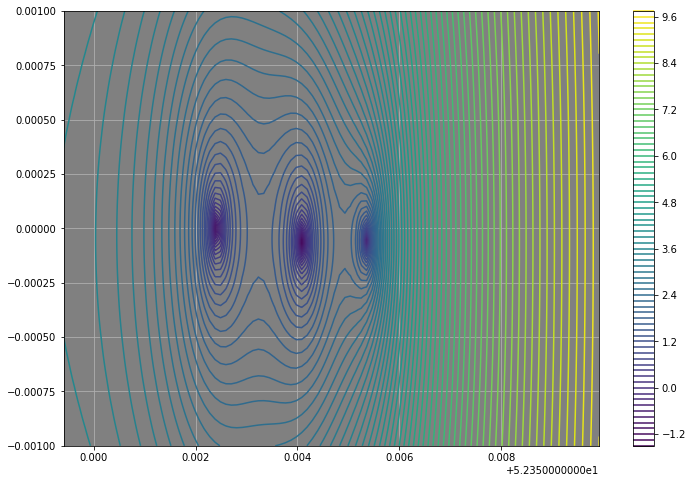

In [7]:
%matplotlib inline
plotlogf(A.determinant, .9998*k_low, 1.000001*k_low, -.001,.001, nu, outer,
         iref=100, rref=100, levels=100)

## One way to discern the true fundamental is to look at the real part.

None of these are guided, but looking at the slice through the real axis shows one root is closer than the others to having zero imaginary part: this root thus has the lowest loss and is the true fundamental

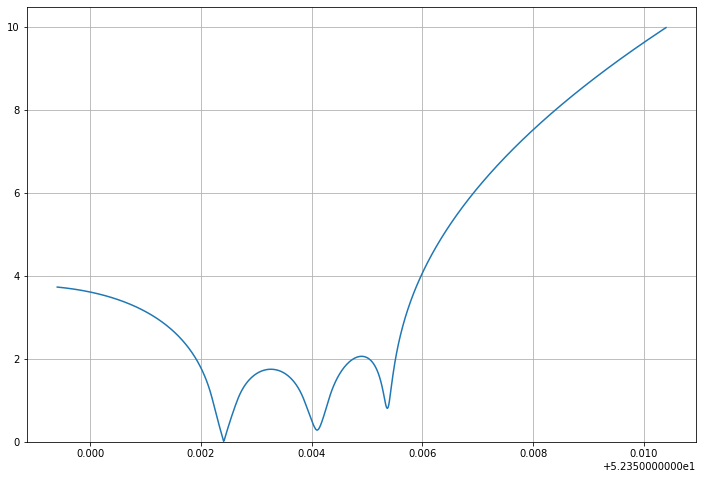

In [8]:
plotlogf_real(A.determinant, .9998*k_low, 1.00001*k_low, nu, outer)

In [9]:
xs = np.linspace(.9998 * k_low, 1.00001 * k_low, 3000)
ys = np.abs(A.determinant(xs, nu, outer))

indx = np.argmin(ys)
guess = xs[indx]

guess

52.352412043442904

In [10]:
guess = np.array(guess)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.35241308450302-2.565824021755743e-07j) . Residual of determinant:  3.0328578625695985e-11


# True Fundamental Mode

In [11]:
Fs1 = A.all_fields(beta1, nu, outer)

## Z-Components

In [12]:
Draw(1e0*Fs1['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs1['Etv'].real, A.mesh, vectors={'grid_size':100})


# The Other fundamental modes

These are similar to the true one, but have most of their energy in the outer ring.

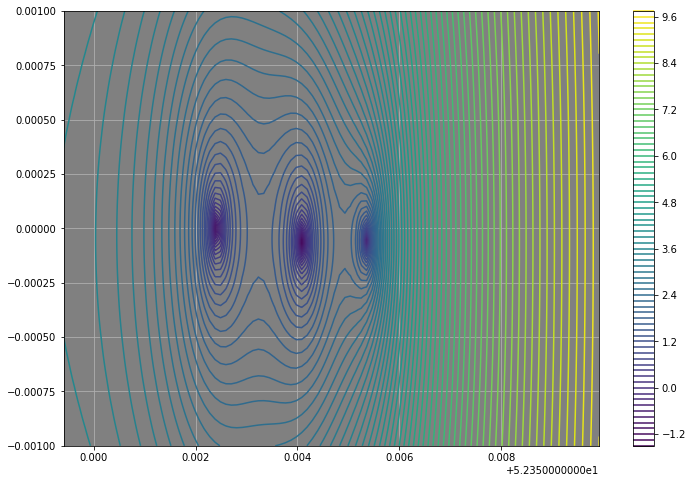

In [13]:
%matplotlib inline
plotlogf(A.determinant, .9998*k_low, 1.000001*k_low, -.001,.001, nu, outer,
         iref=100, rref=100, levels=100)

### Farthest right mode:

Notably, this mode is still nearly linearly polarized (even in the ripple regions).  

(Note that this refers to the real part of the field.)

In [14]:
guess = np.array(.99992*k_low)

beta3 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta3, ". Residual of determinant: ", abs(A.determinant(beta3, nu, outer)))


Scaled beta:  (52.35537267323895-5.6909576857100295e-05j) . Residual of determinant:  1.7787568525335097e-11


In [15]:
Fs3 = A.all_fields(beta3, nu, outer)

In [16]:
Draw(1e0*Fs3['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [18]:
Draw(Fs3['Etv'].Norm(), A.mesh)


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [36]:
Draw(x, A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Matplot version

In [31]:
N, M = 100, 100
R = A.rhos[-1] / A.scale
rs = np.linspace(0, R, N)
thetas = np.linspace(0, 2*np.pi, M)

Rs, Thetas = np.meshgrid(rs, thetas)

X, Y = Rs * np.cos(Thetas), Rs * np.sin(Thetas)

In [32]:
R

8.915555555555557

In [33]:
import matplotlib.pyplot as plt
import cmasher as cmr
cmap = cmr.get_sub_cmap('jet', 0.2, 0.89)


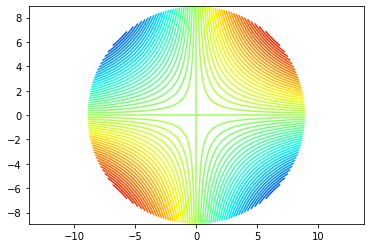

In [34]:
plt.contour(X, Y, X *Y, levels=60, cmap=cmap)
plt.axis('equal');